# Finance Data Project 

This project is focus on exploratory data analysis of stock prices of 6 companies.

____

**Source of the data: Yahoo**


## Imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
%matplotlib inline

c:\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Reading the Data

Reading the data directly from Yahoo finance using pandas for the following banks of the particular time period:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo




In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

#CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

#Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

#JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

#Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

#Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

**Creating a list of the ticker symbols (as strings) in alphabetical order.**

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Concatenate the bank dataframes together to a single data frame called bank_stocks.**

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

**Defining the column names**

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**DataFrame head()**

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

# EDA

**The maximum Close price for each bank's stock throughout the time period**

In [8]:
bank_stocks.xs('Close', level='Stock Info', axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.**


In [9]:
returns = pd.DataFrame()

**Calculating return value using percentage change method for 'Close' columns of each bank.**

In [10]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Pairplot using seaborn of the returns dataframe.**

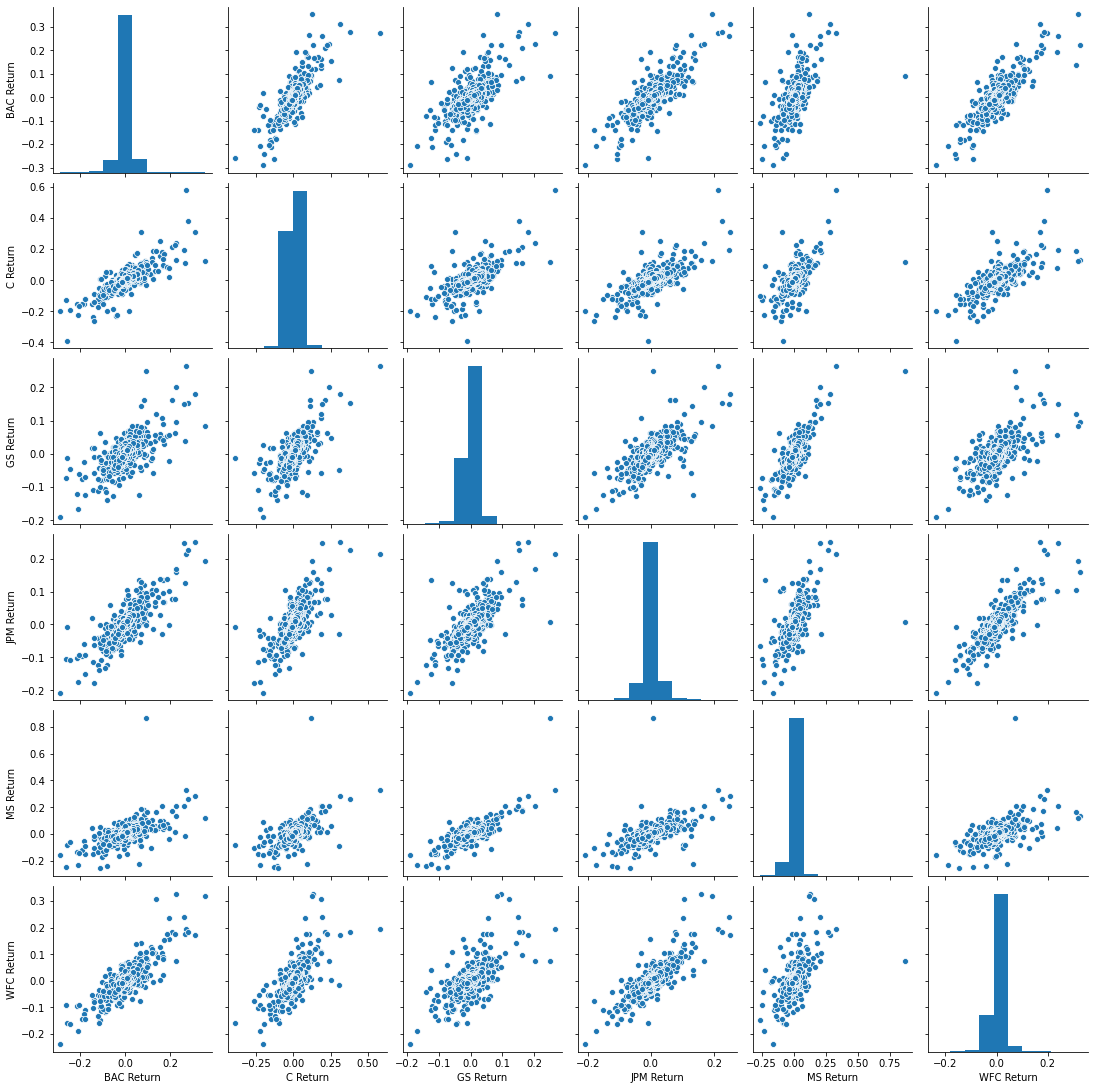

In [11]:
sns.pairplot(returns[1:])

**Using this returns DataFrame, Concluding out on what dates each bank stock had the best and worst single day returns.**

In [11]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [12]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Citi Group and Goldman Sach had same date for best performing whilst Bank of America, Goldman Sach, JPMorgan Chase,and Wells Fargo perfrom bad on same day**

 ___________

## Exploring the riskiest stock over the time and for year 2015
   * Citi Group is riskiest of all time.
   * In Year 2015, show very similar risk profiles Morgan Stanley and Bank of America

In [13]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Distplot of the 2015 returns for Morgan Stanley**

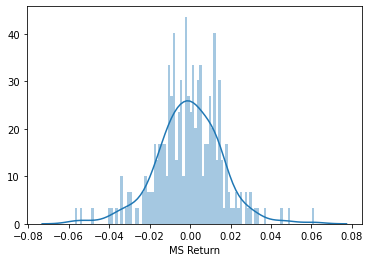

In [24]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=100)

**Distplot of the 2008 returns for CitiGroup**

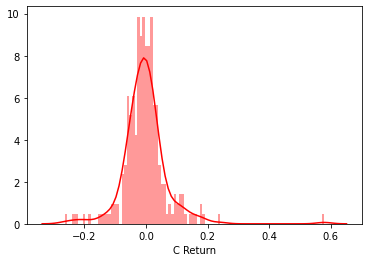

In [28]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=100)

____
## Visualization Imports

In [11]:
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**line plot showing Close price for each bank for the entire index of time.**

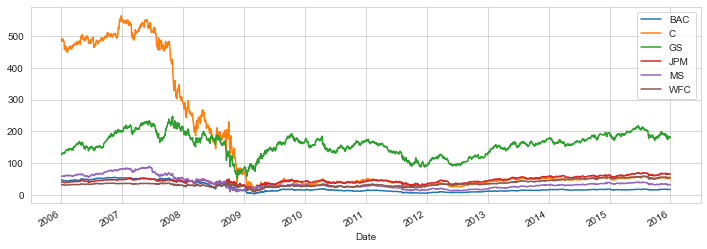

In [24]:
bank_stocks.xs('Close', axis=1, level='Stock Info').plot(figsize=(12,4), label=tick)
plt.legend()

## Moving Averages

Analyzing the moving averages for the stocks in the year 2008. 

**Rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

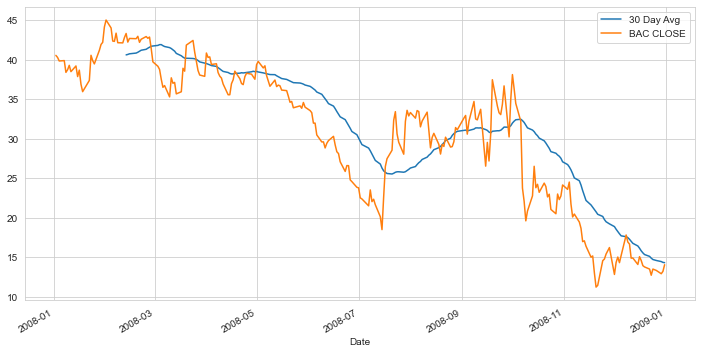

In [12]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Heatmap of the correlation between the stocks Close Price.**

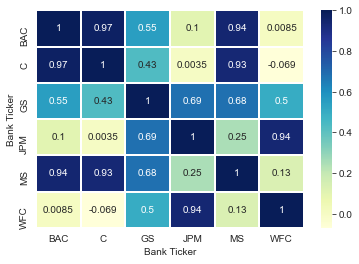

In [23]:
sns.heatmap(data = bank_stocks.xs('Close', level='Stock Info', axis=1).corr(), annot=True, cmap="YlGnBu",
           lw=1)

**Clustermap to cluster the correlations together.**

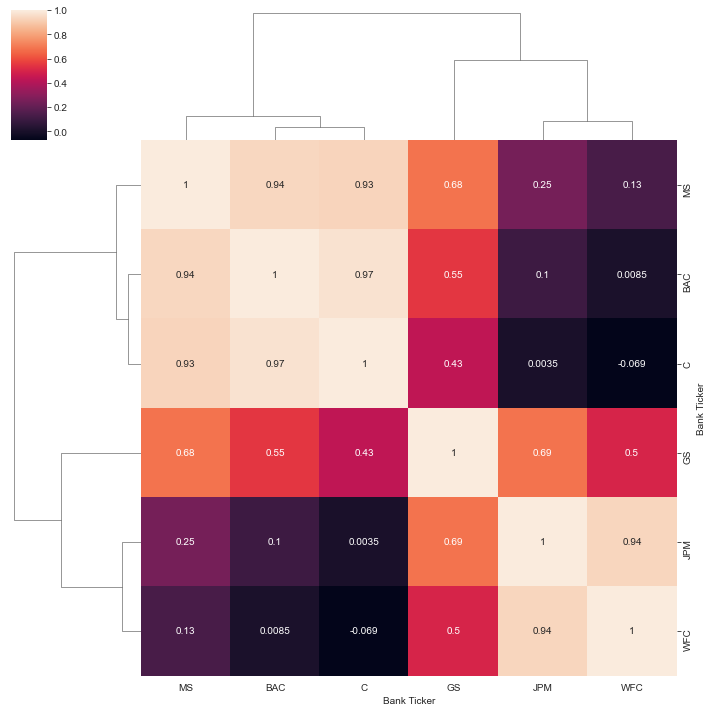

In [24]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [125]:
BAC[['High', 'Low','Open', 'Close']].loc['2015-01-01' : '2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [126]:
MS[['High', 'Low', 'Open', 'Close']].loc['2015-01-01' : '2015-12-31'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [135]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

**End Of the Project**